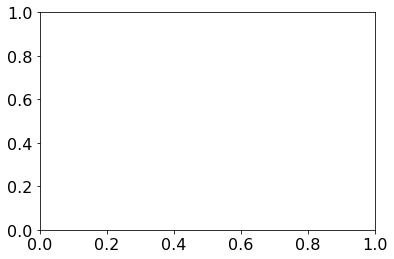

In [33]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots()
SMALL_SIZE = 16
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
import numpy as np
import cv2
from PIL import Image as im
import warnings
warnings.filterwarnings("ignore")

In [34]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [42]:
test = np.load('/content/drive/MyDrive/Disk/Without_Noise/ytest_16_17.npz')
test = test['arr_0']

In [43]:
test1 = np.load('/content/drive/MyDrive/Disk/Without_Noise/xtest_16_17.npz')
test1 = test1['arr_0']

In [44]:
pred = np.load('/content/drive/MyDrive/Disk/Without_Noise/1e-06_pred_16_17.npz')
pred = pred['arr_0']

In [45]:
max_val_den = 1e19
max_val_erms = 13.32106

In [46]:
test = test/255.0
test = test*max_val_den
print(np.amax(test[22]))

8e+16


In [47]:
test1 /= 255.0
test1 *= test1*max_val_erms
print(np.amax(test1[22]))

6.8553114835663935


In [48]:
pred /= 255.0
pred = pred*max_val_den
print(np.amax(pred[22]))

1.6369708e+17


In [49]:
num_img = test.shape[0]
m_test = test.shape[1]
n_test = test.shape[2]

In [50]:
m_pred = pred.shape[1]
n_pred = pred.shape[2]

In [51]:
image_num = num_img
image_num

118

In [ ]:
testflat=np.zeros((256,256))
predflat=np.zeros((256,256))
#testflat=test.reshape(256,256)
for i in range(1):
    #np.savetxt('/content/drive/MyDrive/Microwave-Reflectometry/Reflectometry/Reflectometry_Circle/ResultsP216-19_2/{}_{}_test.dat'.format(i,i+1), test[i].reshape(256,256),newline='\n')
    #np.savetxt('/content/drive/MyDrive/Microwave-Reflectometry/Reflectometry/Reflectometry_Circle/ResultsP216-19_2/{}_{}_pred.dat'.format(i,i+1), pred[i].reshape(256,256),newline='\n')
    np.savetxt('/content/drive/MyDrive/LoadWeight_Predict_Ring/{}_{}_test.dat'.format(i,i+1), test[i].reshape(256,256).flatten())
    np.savetxt('/content/drive/MyDrive/LoadWeight_Predict_Ring/{}_{}_pred.dat'.format(i,i+1), pred[i].reshape(256,256).flatten())

256
256
8e+16
0.0


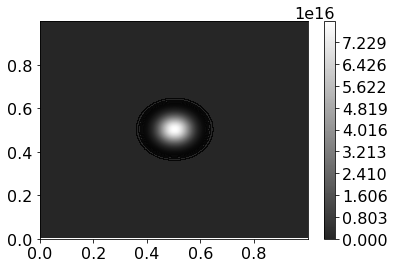

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
import matplotlib.ticker
import matplotlib as mpl

fig, axs = plt.subplots()

m=0
n=0

#m=len(test[:])
m=m_pred
print (m)
y = np.linspace(1, m, m)
#n=len(Erms[:][0])
n=n_pred
print (n)
x = np.linspace(1, n, n)
X, Y = np.meshgrid(x, y)

factor2=1/256
def init():
    cbar = fig.colorbar(im)
    ytics=np.arange(0,1.0,0.2)
    xtics=np.arange(0,1.0,0.2)
    axs.set_yticks(ytics)
    axs.set_xticks(xtics)
#ims2 = ["0_1"]
#for i in ims2:
#    with open('/content/drive/MyDrive/Colab_Notebooks/Datas/Erms_reflectometry/d0.2e19/animE/' + str(i) + '.dat') as file:
#        z = [[float(digit) for digit in line.split()] for line in file]
i=22
z=np.array(test[i].reshape(256,256))
maxz = np.amax(z)
print(maxz)
minz = np.amin(z)
print(minz)
levels = np.linspace(minz, maxz, 250)
im = axs.contourf(factor2*Y,factor2*X, z, levels=levels,cmap="gray",alpha=0.85)
if i==22: 
   init()

256
256
6.8553114835663935
0.0


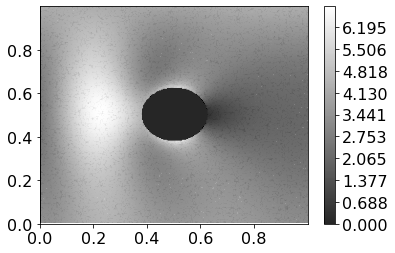

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
import matplotlib.ticker
import matplotlib as mpl

fig, axs = plt.subplots()

m=0
n=0

#m=len(test[:])
m=m_pred
print (m)
y = np.linspace(1, m, m)
#n=len(Erms[:][0])
n=n_pred
print (n)
x = np.linspace(1, n, n)
X, Y = np.meshgrid(x, y)

factor2=1/256
def init():
    cbar = fig.colorbar(im)
    ytics=np.arange(0,1.0,0.2)
    xtics=np.arange(0,1.0,0.2)
    axs.set_yticks(ytics)
    axs.set_xticks(xtics)
#ims2 = ["0_1"]
#for i in ims2:
#    with open('/content/drive/MyDrive/Colab_Notebooks/Datas/Erms_reflectometry/d0.2e19/animE/' + str(i) + '.dat') as file:
#        z = [[float(digit) for digit in line.split()] for line in file]
i=22
z=np.array(test1[i].reshape(256,256))
maxz = np.amax(z)
print(maxz)
minz = np.amin(z)
print(minz)
levels = np.linspace(minz, maxz, 250)
im = axs.contourf(factor2*Y,factor2*X, z, levels=levels,cmap="gray",alpha=0.85)
if i==22: 
   init()

In [54]:
x = range(m_test)
for i in range(num_img):
    x_axis_test = test[i][int(m_test/2)]
    x_axis_pred = pred[i][int(m_pred/2)]
    #factor=1/256
    #fig=plt.figure()
    plt.figure()
    #axs = fig.add_axes([0.1, 0.1, 1, 1]) # main axes
    plt.title("Density Profile {}".format(i), fontsize=15)
    plt.ylabel("Density", fontsize=15,labelpad=7)
    plt.xlabel("No of cells along $x_{central}$", fontsize=15,labelpad=7)
    plt.plot(x, x_axis_test, color='red')
    plt.plot(x, x_axis_pred, color='blue')
    #xtics = np.arange(0,1.2,0.2)
    #ytics = np.arange(0,1.0,0.2)
    #axs.set_xticks(xtics)
    #axs.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0,1.2])
    #axs.set_xticklabels(['0.0','0.2','0.4','0.6','0.8','1.0','1.2'])
    plt.grid()

Output hidden; open in https://colab.research.google.com to view.

In [55]:
loss = np.load('/content/drive/MyDrive/Disk/Without_Noise/1e-06_loss.npy.npz')
lossval = np.load('/content/drive/MyDrive/Disk/Without_Noise/1e-06_vloss.npy.npz')

In [56]:
loss = loss['arr_0']
lossval = lossval['arr_0']

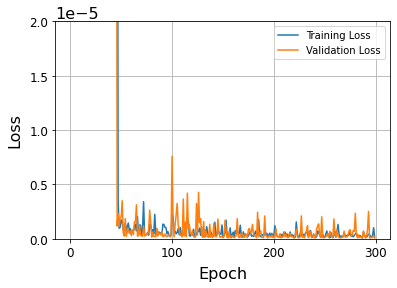

In [57]:
plt.plot(loss[0:400]/1e5)
plt.plot(lossval[0:400]/1e5)
#plt.title('Phase 2 16-19', fontsize=16, fontweight='bold')
plt.xlabel('Epoch',fontsize=16,labelpad=7)
plt.ylabel('Loss',fontsize=16,labelpad=7)
plt.ylim([0,0.00002])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Training Loss','Validation Loss'], fontsize=10)
plt.grid()

In [ ]:
test = np.load('/content/drive/MyDrive/Disk/Without_Noise/y_test256R.npz')
test = test['arr_0']

In [ ]:
pred = np.load('/content/drive/MyDrive/Disk/Without_Noise/1e-06_pred.npz')
pred = pred['arr_0']

In [ ]:
num_images = test.shape[0]
num_images

330

In [ ]:
import numpy as np
#import pickle
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.regularizers import *
from tensorflow.keras import backend as keras
import tensorflow as tf
from PIL import Image, ImageOps
#from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt
#from matplotlib.pyplot import imshow
import pandas as pd


def ssim_metric(d1, d2):
    im1 = tf.convert_to_tensor(d1)
    im2 = tf.convert_to_tensor(d2)
    im1 = tf.expand_dims(im1, axis=0)
    im2 = tf.expand_dims(im2, axis=0)
    ssim1 = tf.image.ssim(im1, im2, max_val=255, filter_size=11, filter_sigma=1.5, k1=0.01, k2=0.03)
    return ssim1

ssim_avg = 0
test = test.astype('float32')
pred = pred.astype('float32')

for i in range(num_img):
    ssim_avg += ssim_metric(test[i,:,:,:], pred[i,:,:,:])
ssim_avg = ssim_avg/num_images
print("The average SSIM metric value is: ", ssim_avg)

The average SSIM metric value is:  tf.Tensor([0.981132], shape=(1,), dtype=float32)
